In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# set the aesthetic style of the plots
sns.set_style()

# filter warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
gloss = pd.read_excel('data/Data Glossary v3.xlsx', engine = 'openpyxl')

In [3]:
gloss

,Unnamed: 0,Unnamed: 1
0,"Often, we do not get codebooks, data looks mes...",NaN
1,This is all we know about the dataset and no a...,NaN
2,NaN,NaN
3,NaN,NaN
4,feature,description
5,x,user_id
6,number_of_cards,number of cards owned by customer
7,outstanding,total outstanding amount of credit card usage
8,credit_limit,credit limit amount that can be used
9,bill,last month customer bill amount


In [4]:
# read data
df = pd.read_csv('data/credit_ds_v3.csv')

In [5]:
df.head()

,X,number_of_cards,outstanding,credit_limit,bill,total_cash_usage,total_retail_usage,remaining_bill,branch_code,payment_ratio,...,default_flag,years_since_card_issuing,total_usage,remaining_bill_per_number_of_cards,remaining_bill_per_limit,total_usage_per_limit,total_3mo_usage_per_limit,total_6mo_usage_per_limit,utilization_3month,utilization_6month
0,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
1,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,NaN
2,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571
3,6,2,6227439,80000000.0,2081248.0,0.0,3690250.0,4613435.0,A,0.00,...,0,10.250000,3690250.0,2306717.5,0.057668,0.046128,0.017184,0.117513,0.038964,0.181863
4,7,2,3906290,4000000.0,2043682.0,0.0,230400.0,3314046.0,A,18.47,...,0,4.666667,230400.0,1657023.0,0.828511,0.057600,0.018750,0.166667,1.014776,0.977231


# Descriptive Analysis 

In [6]:
df = df.rename(columns = {'X': 'user_id'})

In [7]:
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  15645
Number of columns:  24


There are 24 features for 15,645 clients/users. The target variable we are predicting for is 'default_flag', a binary 1 or 0 feature. We will explore all features to treat possible missing values and make oher necessary adjustments to improve the overall quality of the model.

In [8]:
# dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15645 entries, 0 to 15644
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   user_id                             15645 non-null  int64  
 1   number_of_cards                     15645 non-null  int64  
 2   outstanding                         15645 non-null  int64  
 3   credit_limit                        15645 non-null  float64
 4   bill                                15645 non-null  float64
 5   total_cash_usage                    15600 non-null  float64
 6   total_retail_usage                  15645 non-null  float64
 7   remaining_bill                      15645 non-null  float64
 8   branch_code                         15450 non-null  object 
 9   payment_ratio                       15645 non-null  float64
 10  overlimit_percentage                15619 non-null  float64
 11  payment_ratio_3month                15645

There are 23 numerical columns and only 1 categorical column, we note that the latter will have to be label-encoded to pass into the ML algo for prediction

In [9]:
df.isna().sum()

user_id                                  0
number_of_cards                          0
outstanding                              0
credit_limit                             0
bill                                     0
total_cash_usage                        45
total_retail_usage                       0
remaining_bill                           0
branch_code                            195
payment_ratio                            0
overlimit_percentage                    26
payment_ratio_3month                     0
payment_ratio_6month                     0
delinquency_score                       88
default_flag                             0
years_since_card_issuing                 0
total_usage                              0
remaining_bill_per_number_of_cards       0
remaining_bill_per_limit                 0
total_usage_per_limit                    0
total_3mo_usage_per_limit                0
total_6mo_usage_per_limit                0
utilization_3month                       0
utilization

In [10]:
# percentage of missing values per feature
print((df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False))

utilization_6month                    18.165548
branch_code                            1.246405
delinquency_score                      0.562480
total_cash_usage                       0.287632
overlimit_percentage                   0.166187
number_of_cards                        0.000000
outstanding                            0.000000
credit_limit                           0.000000
bill                                   0.000000
total_retail_usage                     0.000000
remaining_bill                         0.000000
payment_ratio                          0.000000
payment_ratio_3month                   0.000000
utilization_3month                     0.000000
payment_ratio_6month                   0.000000
default_flag                           0.000000
years_since_card_issuing               0.000000
total_usage                            0.000000
remaining_bill_per_number_of_cards     0.000000
remaining_bill_per_limit               0.000000
total_usage_per_limit                  0

We note several missing values. The most critical case is 'utilization_6month', which has 18% (2842) missing values. This presents a problem because intuitively, utilization-time ratio is important in indicating credit card usage (later confirmed by plotting the feature importance plot). 

There are several ways to deal with this feature

(1) Preserve the feature and drop the 2842 users with missing values
(2) Drop the feature and preserve the 2842 users
(3) Since the 2842 users are likely to be newer users, as they are without the full 6 month time history, we could build two different models. 
    (a) Older users - retain 'utilization_6month' and 'total_6mo_usage_per_limit' and drop the 2842 newer users
    (b) Newer users - drop 'utilization_6month' and 'total_6mo_usage_per_limit', train only on the 2842 newer users
    
On balance, considering the test-time and model trade-offs, I elect to go for option (2), reasoning that some of the information loss from dropping the feature is mitigated by retaining a similar feature 'utilization_3month'. Indeed correlation analysis later shows that they are strong correlated, making it safer to drop them. 

In [11]:
df = df.drop(columns = ['utilization_6month', 'total_6mo_usage_per_limit'])

In [12]:
# number of unique observations per column
df.nunique().sort_values()

default_flag                              2
delinquency_score                         6
branch_code                              11
number_of_cards                          15
total_cash_usage                         94
credit_limit                            150
years_since_card_issuing                448
overlimit_percentage                   1222
payment_ratio                          2273
payment_ratio_6month                   2416
payment_ratio_3month                   2574
remaining_bill_per_limit               3235
total_usage_per_limit                  3634
total_3mo_usage_per_limit              4015
utilization_3month                     4094
total_retail_usage                     5714
total_usage                            5990
remaining_bill                         6947
remaining_bill_per_number_of_cards     8524
bill                                  10018
outstanding                           10359
user_id                               15645
dtype: int64

# Correlation Analysis

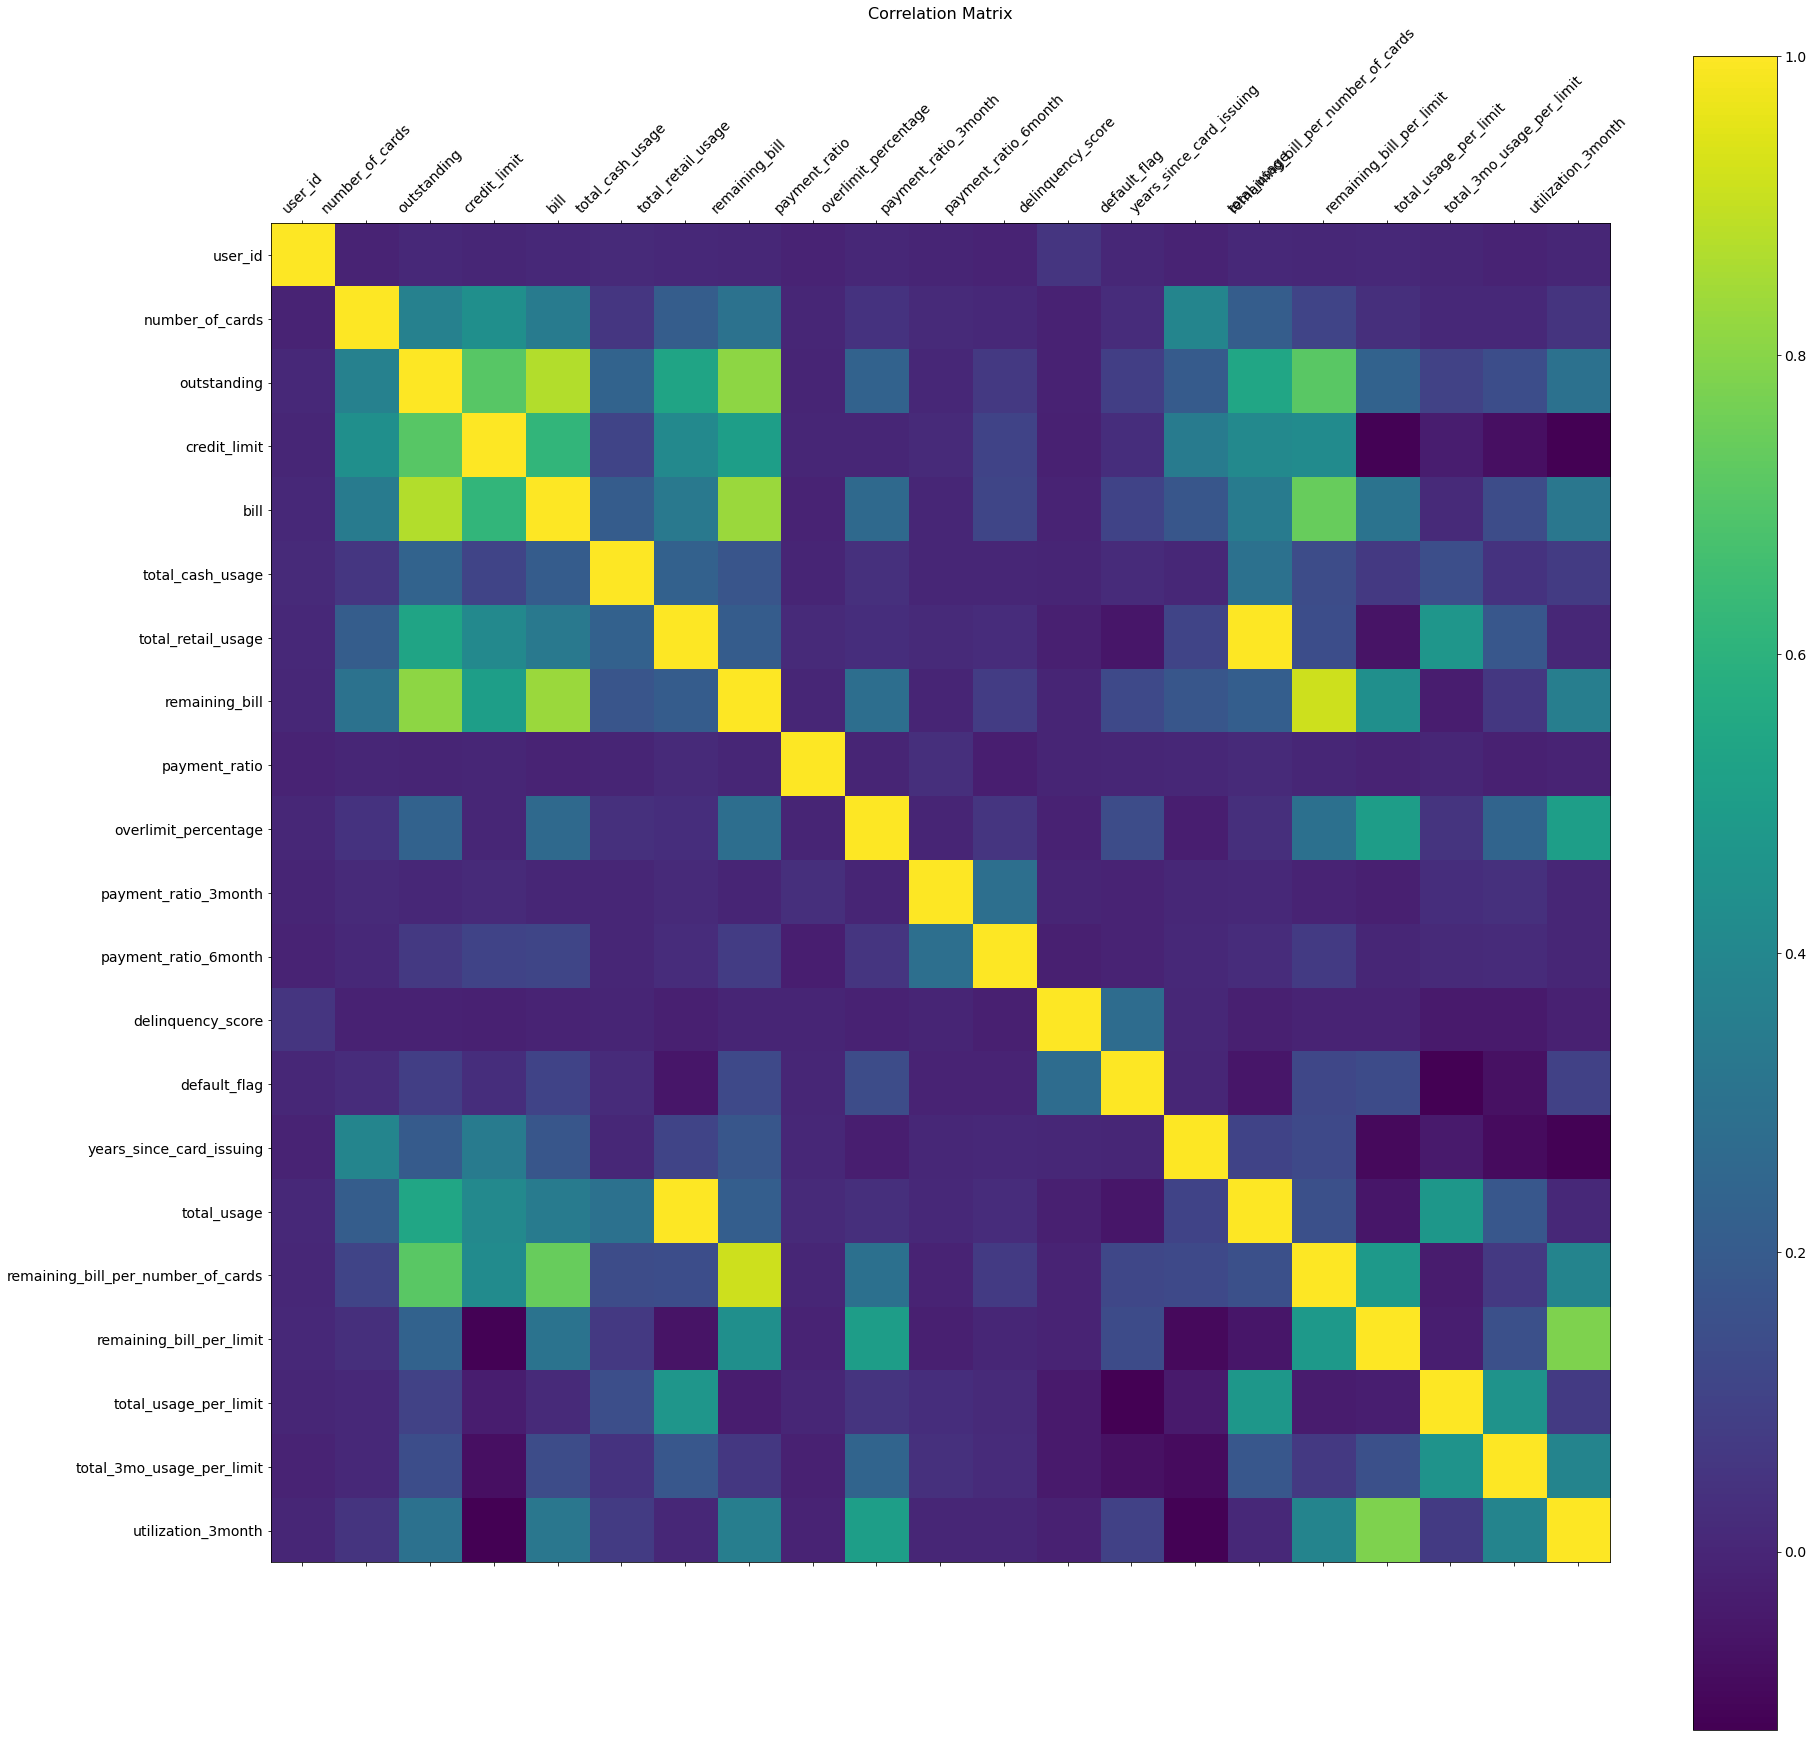

In [13]:
f = plt.figure(figsize=(30, 30))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [14]:
import pandas as pd
import numpy as np

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,user_id,number_of_cards,outstanding,credit_limit,bill,total_cash_usage,total_retail_usage,remaining_bill,payment_ratio,overlimit_percentage,payment_ratio_3month,payment_ratio_6month,delinquency_score,default_flag,years_since_card_issuing,total_usage,remaining_bill_per_number_of_cards,remaining_bill_per_limit,total_usage_per_limit,total_3mo_usage_per_limit,utilization_3month
user_id,1.000000,-0.006393,0.008154,0.002291,0.009039,0.015734,0.007762,0.004551,-0.005618,0.003379,-0.004214,-0.008171,0.054726,0.003759,-0.009184,0.008822,0.003991,0.008322,0.000252,-0.007440,0.001938
number_of_cards,-0.006393,1.000000,0.373873,0.438278,0.346003,0.057379,0.212382,0.301840,0.000605,0.046815,0.012143,0.011771,-0.011747,0.021001,0.392275,0.212460,0.110735,0.030698,0.010204,0.007932,0.047832
outstanding,0.008154,0.373873,1.000000,0.707317,0.871068,0.238832,0.535768,0.811607,-0.001580,0.231171,0.004603,0.068402,-0.011171,0.087640,0.203038,0.543237,0.712734,0.233488,0.103273,0.144680,0.299202
credit_limit,0.002291,0.438278,0.707317,1.000000,0.617095,0.109081,0.406162,0.507696,0.000323,-0.000331,0.013998,0.108087,-0.014978,0.028078,0.347389,0.406294,0.421429,-0.113913,-0.028775,-0.073572,-0.119095
bill,0.009039,0.346003,0.871068,0.617095,1.000000,0.204973,0.335413,0.832762,-0.007573,0.262781,-0.000434,0.115673,-0.006530,0.105897,0.180128,0.344342,0.738752,0.307452,0.015222,0.141734,0.323835
total_cash_usage,0.015734,0.057379,0.238832,0.109081,0.204973,1.000000,0.227616,0.174210,-0.001570,0.035900,-0.000057,0.000398,-0.004449,0.017375,0.004786,0.299576,0.140388,0.065234,0.148046,0.043691,0.076024
total_retail_usage,0.007762,0.212382,0.535768,0.406162,0.335413,0.227616,1.000000,0.204611,0.014002,0.028081,0.012073,0.022512,-0.020756,-0.051667,0.109046,0.997217,0.144436,-0.059227,0.471006,0.183825,0.005051
remaining_bill,0.004551,0.301840,0.811607,0.507696,0.832762,0.174210,0.204611,1.000000,-0.000173,0.284741,-0.004435,0.080104,-0.003419,0.127490,0.178755,0.213832,0.913902,0.436560,-0.028194,0.063222,0.358946
payment_ratio,-0.005618,0.000605,-0.001580,0.000323,-0.007573,-0.001570,0.014002,-0.000173,1.000000,-0.003891,0.029548,-0.024208,-0.001373,-0.001038,0.004159,0.013598,-0.000455,-0.007660,0.000612,-0.015565,-0.009560
overlimit_percentage,0.003379,0.046815,0.231171,-0.000331,0.262781,0.035900,0.028081,0.284741,-0.003891,1.000000,-0.002232,0.053644,-0.011526,0.140546,-0.023305,0.030256,0.293891,0.504485,0.048227,0.239547,0.509500


In [15]:
df2 = df.drop(columns = ['branch_code'])

In [16]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending= False)
    return au_corr[0:n]

print("Top Correlations")
print(get_top_correlations(df2, 50))

Top Correlations
total_retail_usage                  total_usage                           0.997217
remaining_bill                      remaining_bill_per_number_of_cards    0.913902
outstanding                         bill                                  0.871068
bill                                remaining_bill                        0.832762
outstanding                         remaining_bill                        0.811607
remaining_bill_per_limit            utilization_3month                    0.783759
bill                                remaining_bill_per_number_of_cards    0.738752
outstanding                         remaining_bill_per_number_of_cards    0.712734
                                    credit_limit                          0.707317
credit_limit                        bill                                  0.617095
outstanding                         total_usage                           0.543237
                                    total_retail_usage                

In [17]:
corr_df = pd.DataFrame(get_top_correlations(df2, 300)).reset_index()
corr_df.columns = ['var_1', 'var_2', 'correlation']

In [18]:
corr_df[(corr_df['var_1'] == 'default_flag') | (corr_df['var_2'] == 'default_flag')]

,var_1,var_2,correlation
41,delinquency_score,default_flag,0.275741
65,overlimit_percentage,default_flag,0.140546
67,default_flag,remaining_bill_per_limit,0.134803
69,remaining_bill,default_flag,0.127490
70,default_flag,remaining_bill_per_number_of_cards,0.120161
77,bill,default_flag,0.105897
79,default_flag,utilization_3month,0.099121
80,outstanding,default_flag,0.087640
103,credit_limit,default_flag,0.028078
106,number_of_cards,default_flag,0.021001


Looking at the correlations give us some observations and ideas for feature engineering

*Observations*
Bivariate positive correlations are much stronger than negative correlations. The positive correlations are in the range of 0.1 to 0.99 whereas the negative correlations are in the range of -0.006 to -0.13. 

Most correlations are not surprising and intuitive. In summary there are strong positive correlations between credit_limit, utilization,usage, bills, and outstandings. This is intuitive. The more usage, utilization, and limits, the larger bills and outstandings will be. 

Our target variable, default_flag, is most significantly related to delinquency_score, overlimit_percentage, bills and remaining bills and utilization. This is also intuitive. The higher the utilization, bill amounts the more the user has to pay back, and likelier to default (if they are not able). The rship with delinquency is also obvious. 

*Ideas for Feature Engineering*
Given the rship between default_flag, bills, and outstanding. There is room for more features to be engineered to create more indicators of users having overdrawn or overleveraged. Some features I create later are 

1) 'remaining_bill_over_outstanding' - proportion of the last month's remaining bill over the total outstanding
2) 'retail_card_usage' - subtracting cash usage from total usage gives us card usage 
3) 'outstanding_over_per_card_limit' - dividing the outstanding by per-card limit. By normalising outstanding on a per card limit basis (limit/no. of cards), we can try to catch users whose high total credit limit might be disguising their inability to pay back.

# Treating Missing Values
It's time to deal with the missing values according to the particularities of each feature, as below:

Categorical variables will be filled with the most recurrent value.
Numerical variables will be filled with their median values.

In [19]:
def impute_miss_data(df, excepted_columns = 'None'): 
    """
    Apply cross-validation on the training set.

    # Arguments
        X: DataFrame containing the independent variables.
        y: Series containing the target vector.
        clf: Scikit-learn estimator instance.
        
    # Returns
        float, mean value of the cross-validation scores.
    """
    if excepted_columns!= 'None':
    
        excepted_df = df[excepted_columns]
    
        df = df.drop(columns = [excepted_columns])
    
    df_num = df.select_dtypes(exclude='object').columns
    df_cat = df.select_dtypes(include='object').columns

    # fill missing values for numerical variables
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    imputer = imputer.fit(df.loc[:, df_num])
    df.loc[:, df_num] = imputer.transform(df.loc[:, df_num])

    # fill missing values for categorical variables
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imputer = imputer.fit(df.loc[:, df_cat])
    df.loc[:, df_cat] = imputer.transform(df.loc[:, df_cat])
    
    if excepted_columns!= 'None':
        df = pd.concat([df, excepted_df], axis = 1)
    
    return df

In [20]:
df = impute_miss_data(df)
df.to_csv('processed_data/df.csv')

After handling the missing values, case by case, we now have a data set free of null values.